## DS200: Introduction to Data Sciences
# Section 1, Fall 2024
# Lab Assignment 6: Linear Regression, Least Squares Regression (4 points)

# Instructor: John Yen
# LAs: Lauren Miller, Aaron Almeida, Amiera Masheetah Binti Irwan Rizalman, and Sharifah Rodziah Hanim BintiSyed Alwi
# Total points: 4 points

- Exercise 1A: 0.3 point
- Exercise 1B: 0.4 point
- Exercise 1C: 0.4 point
- Exercise 1D: 0.4 point
- Exercise 2A: 0.3 points
- Exercise 2B: 0.4 points
- Exercise 2C: 0.4 points
- Exercise 2D: 0.4 points
- Exercise 3A: 0.3 points
- Exercise 3B: 0.3 points
= Exercise 3C: 0.4 points

## Due: midnight October 9, 2024


In [ ]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In this lab assignment, we will use the happyscore_income.csv file as the dataset:

We will use this dataset to learn to apply least squares regression to find the optimal linear model that minimizes the root mean squares error (RMSE).


In [ ]:
world_happiness_table = Table.read_table('world-happiness-report-2024.csv')


In [ ]:
world_happiness_table.show(5)

Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
Denmark,Western Europe,7.583,7.665,7.5,1.908,1.52,0.699,0.823,0.204,0.548,1.881
Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.05
Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.74,0.641,0.153,0.193,2.298


In [ ]:
Ladder_array = world_happiness_table.column("Ladder score")

In [ ]:
print(Ladder_array)

[ 7.741  7.583  7.525  7.344  7.341  7.319  7.302  7.122  7.06   7.057
  7.029  6.955  6.951  6.905  6.9    6.894  6.838  6.822  6.818  6.749
  6.743  6.733  6.725  6.719  6.678  6.611  6.609  6.594  6.561  6.523
  6.503  6.491  6.469  6.448  6.442  6.421  6.411  6.36   6.358  6.346
  6.324  6.287  6.284  6.272  6.257  6.234  6.195  6.188  6.188  6.068
  6.06   6.058  6.048  6.043  6.03   6.017  5.977  5.976  5.975  5.973
  5.968  5.959  5.942  5.934  5.877  5.866  5.842  5.841  5.823  5.816
  5.816  5.785  5.784  5.725  5.714  5.707  5.696  5.695  5.607  5.568
  5.463  5.455  5.422  5.369  5.364  5.316  5.304  5.281  5.221  5.216
  5.185  5.166  5.158  5.139  5.106  5.08   5.023  4.975  4.969  4.923
  4.893  4.881  4.879  4.874  4.873  4.832  4.795  4.657  4.556  4.548
  4.505  4.485  4.471  4.47   4.422  4.377  4.372  4.354  4.341  4.289
  4.269  4.232  4.228  4.214  4.186  4.054  3.977  3.898  3.886  3.861
  3.781  3.566  3.561  3.502  3.502  3.421  3.383  3.341  3.295  3.245
  3.18

In [ ]:
GDP_pc_array = world_happiness_table.column("Log GDP per capita")

In [ ]:
print(GDP_pc_array)

[ 1.844  1.908  1.881  1.878  1.803  1.901  1.952  2.141  1.97   1.854
  1.81   1.561  1.845  1.885  1.84   1.868  2.129  1.783  1.766  1.822
  1.786  1.983  1.939  1.871  1.521  1.596  1.818  1.842  1.364  2.118
  1.842  1.699  1.265  1.752  1.738  1.766  1.538  1.616  1.702  1.827
  1.8    1.26   1.097  1.43   1.706  1.7    1.212  1.562  1.622  1.794
  1.786  1.815  1.232  1.331  1.728  1.722  1.398  1.484  1.646  1.497
  1.091    nan  1.71   1.684  1.465  1.526  1.28   1.371  1.517  1.57
  1.385  1.642  1.217  1.315  1.054  1.571  1.353  1.437  0.     1.361
  1.629  1.444  1.389  1.475  1.324  1.909  1.438    nan  0.892  0.56
  1.467  1.249  0.965  1.208  1.403  1.08   0.831  1.702  0.927  1.435
  1.433  1.042    nan  0.943  1.35   1.266  1.213  1.069  0.573  0.756
  1.078  0.75   0.603  1.037  1.306  0.914  0.772  0.978  1.011  1.077
  0.619  0.747  0.628  0.758  1.262  1.166  1.37   1.361  1.122  0.792
  0.82   0.896  0.671  0.899  1.255  0.617  1.445  0.748  0.534  0.654
  0.771 

# Problem 1A (0.3 points)
Using ``are.above(0.0)`` in ``where`` method of ``Table`` to filter out countries that have missing or zero value for "Log GDP per capita" column.

In [ ]:
filtered_GDP_table = world_happiness_table.where("Log GDP per capita", are.above(0.0))

In [ ]:
filtered_GDP_table.show(4)

Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
Denmark,Western Europe,7.583,7.665,7.5,1.908,1.52,0.699,0.823,0.204,0.548,1.881
Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.05
Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658


In [ ]:
filtered_GDP_pc_array = filtered_GDP_table.column("Log GDP per capita")

## Check filtered results:
If you filtered correctly, you should not see any zeros or missing values (e.g., nan) in the array of GDP per capita from filtered countries.

In [ ]:
print(filtered_GDP_pc_array)

[ 1.844  1.908  1.881  1.878  1.803  1.901  1.952  2.141  1.97   1.854
  1.81   1.561  1.845  1.885  1.84   1.868  2.129  1.783  1.766  1.822
  1.786  1.983  1.939  1.871  1.521  1.596  1.818  1.842  1.364  2.118
  1.842  1.699  1.265  1.752  1.738  1.766  1.538  1.616  1.702  1.827
  1.8    1.26   1.097  1.43   1.706  1.7    1.212  1.562  1.622  1.794
  1.786  1.815  1.232  1.331  1.728  1.722  1.398  1.484  1.646  1.497
  1.091  1.71   1.684  1.465  1.526  1.28   1.371  1.517  1.57   1.385
  1.642  1.217  1.315  1.054  1.571  1.353  1.437  1.361  1.629  1.444
  1.389  1.475  1.324  1.909  1.438  0.892  0.56   1.467  1.249  0.965
  1.208  1.403  1.08   0.831  1.702  0.927  1.435  1.433  1.042  0.943
  1.35   1.266  1.213  1.069  0.573  0.756  1.078  0.75   0.603  1.037
  1.306  0.914  0.772  0.978  1.011  1.077  0.619  0.747  0.628  0.758
  1.262  1.166  1.37   1.361  1.122  0.792  0.82   0.896  0.671  0.899
  1.255  0.617  1.445  0.748  0.534  0.654  0.771  1.377  0.628]


## Notice: To develop a linear regression model to predict happiness ("ladder score" in the table) from "GDP per captia", we want to gather "Ladder score" of countries from the **filtered table** so that countries who do not have non-zero GDP per capita are **NOT INCLUDED**.

### There are other more advanced techniques in machine learning for dealing with missing values.

In [ ]:
filtered_ladder_array = filtered_GDP_table.column("Ladder score")

In [ ]:
print(filtered_ladder_array)

[ 7.741  7.583  7.525  7.344  7.341  7.319  7.302  7.122  7.06   7.057
  7.029  6.955  6.951  6.905  6.9    6.894  6.838  6.822  6.818  6.749
  6.743  6.733  6.725  6.719  6.678  6.611  6.609  6.594  6.561  6.523
  6.503  6.491  6.469  6.448  6.442  6.421  6.411  6.36   6.358  6.346
  6.324  6.287  6.284  6.272  6.257  6.234  6.195  6.188  6.188  6.068
  6.06   6.058  6.048  6.043  6.03   6.017  5.977  5.976  5.975  5.973
  5.968  5.942  5.934  5.877  5.866  5.842  5.841  5.823  5.816  5.816
  5.785  5.784  5.725  5.714  5.707  5.696  5.695  5.568  5.463  5.455
  5.422  5.369  5.364  5.316  5.304  5.221  5.216  5.185  5.166  5.158
  5.139  5.106  5.08   5.023  4.975  4.969  4.923  4.893  4.881  4.874
  4.873  4.832  4.795  4.657  4.556  4.548  4.505  4.485  4.471  4.47
  4.422  4.377  4.372  4.354  4.341  4.289  4.269  4.232  4.228  4.214
  4.186  4.054  3.977  3.898  3.886  3.861  3.781  3.566  3.561  3.502
  3.502  3.421  3.383  3.341  3.295  3.245  3.186  2.707  1.721]


# Before building a linear regression model, it is a good idea to check where there is a correlation between GDP per captia and ladder score.

## If the correlation stregnth is low, we may need to consider other variables (or combination of variables) in designing the linear regression model.

In [ ]:
c_matrix = np.corrcoef(filtered_GDP_pc_array, filtered_ladder_array)

In [ ]:
print(c_matrix)

[[ 1.          0.80117147]
 [ 0.80117147  1.        ]]


# Linear Regression

We have learned about linear regresion in class, where the optimal linear model can be found by minimizing the sum of squared errors (SSE). Let's use the global happiness dataset as a practice example to go through the steps of linear regression. Recall that, in a linear regression, we assume the relationship between $X$ and $Y$ is linear, as described by the linear function:

$y = f(x) = a x + b$

where slope $a$ and intercept $b$ are the parameters (or coefficients) of the linear model that minimizes the sum of squred errors.




The parameters, $a$ and $b$, can either be calculated using the closed-form solution for linear regression, or through numerical optimization.

### Problem 1B: Slope and Intercept of Regression Line using Closed-form Solution of Linear Regression (0.4 points)

Use linear regression to model the relationship between the two variables ``GDP per capita`` ($X$) and ``Ladder score`` ($Y$). Write the code to calculate the slope and intercept of the regression line using equations given in Lecture 6 notes. Print out the values of slope and intercept after calculation.

*Hint*: Recall from lecture notes that the closed-form solution regression line is defined by the following linear model:

$y = f(x) = r_{X,Y} \frac{\sigma_Y}{\sigma_X} x + \mu_Y - r_{X,Y} \frac{\sigma_Y}{\sigma_X} \mu_X$

where $r_{X,Y}$ is the correlation coefficient between $X$ and $Y$, $\sigma_X$ and $\sigma_Y$ are the standard deviation of $X$ and $Y$ respectively, and $\mu_X$ and $\mu_Y$ are the mean of $X$ and $Y$ respectively.





In [ ]:
# write your solution to Problem 1A by completing the code cells below


In [ ]:
X_mean = np.mean(filtered_GDP_pc_array)
print(X_mean)

1.38872661871


In [ ]:
X_std = np.std(filtered_GDP_pc_array)
print(X_std)

0.408574532104


In [ ]:
Y_mean = np.mean(filtered_ladder_array)
print(Y_mean)

5.53034532374


In [ ]:
Y_std = np.std(filtered_ladder_array)
print(Y_std)

1.1812290984


In [ ]:
XY_corr_matrix = np.corrcoef(filtered_GDP_pc_array, filtered_ladder_array)
print(XY_corr_matrix)

[[ 1.          0.80117147]
 [ 0.80117147  1.        ]]


In [ ]:
XY_corr = XY_corr_matrix[0][1]
print(XY_corr)

0.801171469484


In [ ]:
slope = XY_corr * Y_std / X_std
print(slope)

2.31626540129


In [ ]:
intercept = Y_mean - slope * X_mean
print(intercept)

2.31368590498


### Problem 1C: Draw a Scatter Plot to Visualize the Two Variables and Draw the Regression Line on the Scatter Plot (0.4 points)

Draw a scatter plot to visualize the two variables $X$ (``GDP per capita`` on the x-axis) and $Y$ (``Ladder score`` on the y-axis). Visualize the regression line on the scatter plot by drawing a dot at *(x, predicted_y)* for many values of *x* in its range.

The Python module `matplotlib`
is a very useful visualization library for Python.
We will use `scatter` method associated with `matplotlib.pyplots`, which
we have imported as `plots`.  
Therefore, we can invoke the
method using `plots.scatter` for drawing scatter plots.
The parameters of `plots.scatter` are two arrays, corresponding to the
X-dimension and Y-dimension of the scatter plot.

*Hint:* If sometimes your call to a plot function is not working as expected, go to the beginning of this notebook, re-run the first code cell where the `matplotlib.pyplot` was imported, and then try again.

**Notice:** The **first** parameter to ``scatter`` is the array of the **X** dimension, and the second parameter to ``scatter`` is the array of the Y dimension.


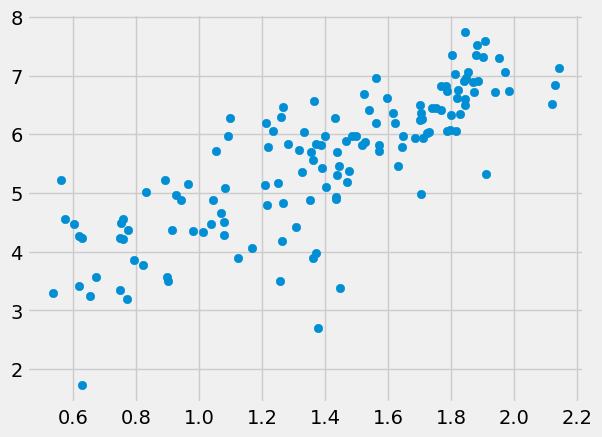

In [ ]:
plots.scatter(filtered_GDP_pc_array, filtered_ladder_array)

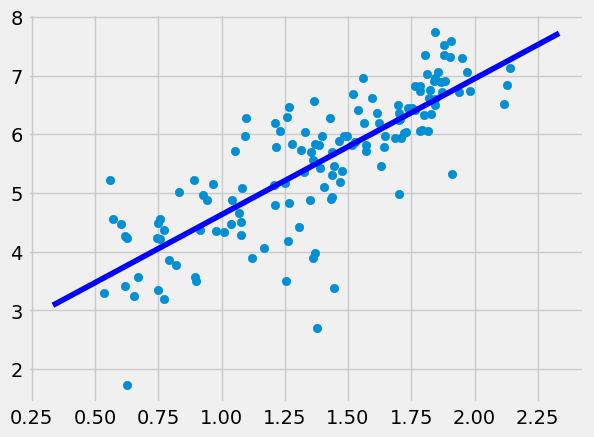

In [ ]:
# write your solution to Problem 1C by completing codes in this code cell

# write one line of code below to draw the scatter plot
plots.scatter(filtered_GDP_pc_array, filtered_ladder_array)

# Specify the range of x values for the regression line
regline_x_values = np.arange(min(filtered_GDP_pc_array)-0.2, max(filtered_GDP_pc_array)+0.2, 0.1)

# write one line of code below to calculate the y values on the regression line, using regline_x_values, slope and intercept (from Problem 1B)
# store the calculated y values in a variable `regline_y_values`
regline_y_values = slope * regline_x_values + intercept
# plot the regression line in blue
# note: you need to first write the line of code above to calculate `regline_y_values`, before the line below for plotting would work
plots.plot(regline_x_values, regline_y_values, 'b')





### Problem 1D: Estimation of Slope and Intercept of Regression Line using Numerical Optimization Minimizing RMSE (0.4 points)

The slope and intercept of the best-fit linear model can also be estimated using numerical optimization. Starting from an initial guess for the values of the two parameters, an optimization algorithm can search for the optimal parameter values that miminize an objective function. In linear regression, the objective function can be the root mean square error calculated from observed and predicted y values. See Topic 6 notes for details about linear regression using numerical optimization.

In Problem 1C, you are asked to write the code that uses the *minimize* function to find the slope and intercept of the optimal line. First, define a function *linear_rmse* that returns the root mean square error (RMSE) of predicted ladder score from GDP-per-capita, given any slope and any intercept. Second, call the *minimize* function with *linear_rmse* as its input argument to get the optimal slope and intercept. Third, print out the slope and intercept and compare them with the values obtained from your solution to Problem 1A.





In [ ]:
len(filtered_GDP_pc_array)

139

In [ ]:
filtered_GDP_pc_array[0]

1.8440000000000001

In [ ]:
filtered_GDP_pc_array[138]

0.628

### Notice how the index for an array starts with 0, ends with n-1; where n is the length of the array.
### However, the ``for`` statement in Python uses ``range(0, n)`` to indicate the index starts with 0, and ends at **n-1**.

#### As an example, the following for loop prints all elements of the X_array. Double check that the last element printed from X_array is the last element of the array.

In [ ]:
for i in range(0, len(filtered_GDP_pc_array)):
  print(filtered_GDP_pc_array[i])

1.844
1.908
1.881
1.878
1.803
1.901
1.952
2.141
1.97
1.854
1.81
1.561
1.845
1.885
1.84
1.868
2.129
1.783
1.766
1.822
1.786
1.983
1.939
1.871
1.521
1.596
1.818
1.842
1.364
2.118
1.842
1.699
1.265
1.752
1.738
1.766
1.538
1.616
1.702
1.827
1.8
1.26
1.097
1.43
1.706
1.7
1.212
1.562
1.622
1.794
1.786
1.815
1.232
1.331
1.728
1.722
1.398
1.484
1.646
1.497
1.091
1.71
1.684
1.465
1.526
1.28
1.371
1.517
1.57
1.385
1.642
1.217
1.315
1.054
1.571
1.353
1.437
1.361
1.629
1.444
1.389
1.475
1.324
1.909
1.438
0.892
0.56
1.467
1.249
0.965
1.208
1.403
1.08
0.831
1.702
0.927
1.435
1.433
1.042
0.943
1.35
1.266
1.213
1.069
0.573
0.756
1.078
0.75
0.603
1.037
1.306
0.914
0.772
0.978
1.011
1.077
0.619
0.747
0.628
0.758
1.262
1.166
1.37
1.361
1.122
0.792
0.82
0.896
0.671
0.899
1.255
0.617
1.445
0.748
0.534
0.654
0.771
1.377
0.628


In [ ]:
# write your solution to Problem 1D in this code cell

def linear_rmse(slope, intercept):
  X_array = filtered_GDP_pc_array
  Y_array = filtered_ladder_array

  # write code below to calculate and return the RMSE given input slope and intercept
  # ...
  data_size = len(X_array)
  sum_error_sq = 0
  predictions = Table().with_column('Y prediction', make_array())
  for i in range(0, data_size):
    Y_predict = X_array[i] * slope + intercept
    predictions = predictions.with_row([Y_predict])
    error = Y_array[i] - Y_predict
    sum_error_sq = sum_error_sq + (error**2)
  RMSE = (sum_error_sq/data_size)**0.5
  print("slope =", slope, ", intercept =", intercept, ", RMSE = ", RMSE)
  return(RMSE)


In [ ]:
# call the minimize function with linear_rmse function as its argument
parameters = minimize(linear_rmse)

# write code below to print out the optimal slope and intercept returned by the minimize function
# Note: the returned parameters is an array with two values, which are the optimal slope and the intercept values, respectively.

slope = 0.0 , intercept = 0.0 , RMSE =  5.6550881145
slope = 0.0 , intercept = 0.0 , RMSE =  5.6550881145
slope = 1.0 , intercept = 0.0 , RMSE =  4.23579011256
slope = 2.618034 , intercept = 0.0 , RMSE =  2.02594352799
slope = 35.2023646503 , intercept = 0.0 , RMSE =  45.3959237832
slope = 15.0641404412 , intercept = 0.0 , RMSE =  16.2624829336
slope = 7.37202349291 , intercept = 0.0 , RMSE =  5.18903111066
slope = 4.43389635065 , intercept = 0.0 , RMSE =  1.28123583891
slope = 4.08616956923 , intercept = 0.0 , RMSE =  1.02147994545
slope = 3.78613637659 , intercept = 0.0 , RMSE =  0.966734709827
slope = 3.83147371822 , intercept = 0.0 , RMSE =  0.962718130556
slope = 3.86978845541 , intercept = 0.0 , RMSE =  0.962804810388
slope = 3.83147371822 , intercept = 0.0 , RMSE =  0.962718130556
slope = 3.83147371822 , intercept = 1.0 , RMSE =  1.22795546912
slope = 3.83147371822 , intercept = -1.618034 , RMSE =  2.05493019351
slope = 3.83147371822 , intercept = -0.618033974844 , RMSE =  1.252

In [ ]:
print(parameters)

[ 2.31626529  2.31368106]


# Compare the slope and intersept calculated this way with those calculated using the formula.  Are they close?

# Problem 2: Linear Regression using another variable

In this last part of the assignment, let us try linear regression using another variable.  Modify your code for Problem 1A, 1B, 1C, and 1D and use them to perform linear regression using ``Healthy life_expectancy`` of each country to predict its ``Ladder score`` (i.e., how happy are people in the country).




In [ ]:
life_exp_array = world_happiness_table.column("Healthy life expectancy")

In [ ]:
print(life_exp_array)

[ 0.695  0.699  0.718  0.724  0.74   0.706  0.704  0.708  0.747  0.692
  0.673  0.661  0.661  0.696  0.701  0.69   0.7    0.638  0.598  0.672
  0.695  0.563  0.542  0.702  0.544  0.592  0.727  0.511  0.599  0.769
  0.65   0.583  0.549  0.657  0.639  0.729  0.585  0.673  0.633  0.707
  0.72   0.467  0.542  0.548  0.638  0.564  0.539  0.585  0.556  0.744
  0.785  0.77   0.441  0.539  0.699  0.596  0.549  0.62   0.54   0.629
  0.502    nan  0.637  0.696  0.587  0.55   0.567  0.662  0.511  0.49
  0.542  0.531  0.488  0.64   0.588  0.587  0.4    0.648  0.491  0.472
  0.567  0.603  0.322  0.569  0.568  0.857  0.638    nan  0.306  0.156
  0.524  0.498  0.443  0.423  0.344  0.288  0.236  0.631  0.392  0.571
  0.496  0.256    nan  0.288  0.513  0.307  0.495  0.321  0.293  0.274
  0.4    0.33   0.199  0.353  0.579  0.284  0.373  0.436  0.442  0.36
  0.301  0.267  0.333  0.32   0.594  0.417  0.488  0.586  0.513  0.42
  0.38   0.37   0.293  0.264  0.176  0.349  0.241  0.232  0.262  0.253
  0.     

# If you see `nan` in the array, it means missing values.
## We need to filter out countries who do not have positive values for ``Healthy lifetime expectancy``.

# Problem 2A (0.3 points)
Create a table that does not (i.e., filter out) any countries that do not have positive values for the column "Healthy life expectancy", in a way similar to your solution to Problem 1A.

In [44]:
filtered_expectancy_table = world_happiness_table.where("Healthy life expectancy", are.above(0.0))

In [45]:
filtered_expectancy_table.show(5)

Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
Denmark,Western Europe,7.583,7.665,7.5,1.908,1.52,0.699,0.823,0.204,0.548,1.881
Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.05
Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.74,0.641,0.153,0.193,2.298


In [46]:
filtered_expectancy_array = filtered_expectancy_table.column("Healthy life expectancy")

In [47]:
print(filtered_expectancy_array)

[ 0.695  0.699  0.718  0.724  0.74   0.706  0.704  0.708  0.747  0.692
  0.673  0.661  0.661  0.696  0.701  0.69   0.7    0.638  0.598  0.672
  0.695  0.563  0.542  0.702  0.544  0.592  0.727  0.511  0.599  0.769
  0.65   0.583  0.549  0.657  0.639  0.729  0.585  0.673  0.633  0.707
  0.72   0.467  0.542  0.548  0.638  0.564  0.539  0.585  0.556  0.744
  0.785  0.77   0.441  0.539  0.699  0.596  0.549  0.62   0.54   0.629
  0.502  0.637  0.696  0.587  0.55   0.567  0.662  0.511  0.49   0.542
  0.531  0.488  0.64   0.588  0.587  0.4    0.648  0.491  0.472  0.567
  0.603  0.322  0.569  0.568  0.857  0.638  0.306  0.156  0.524  0.498
  0.443  0.423  0.344  0.288  0.236  0.631  0.392  0.571  0.496  0.256
  0.288  0.513  0.307  0.495  0.321  0.293  0.274  0.4    0.33   0.199
  0.353  0.579  0.284  0.373  0.436  0.442  0.36   0.301  0.267  0.333
  0.32   0.594  0.417  0.488  0.586  0.513  0.42   0.38   0.37   0.293
  0.264  0.176  0.349  0.241  0.232  0.262  0.253  0.556  0.242]


In [48]:
# We slightly change the variable name so that it does not conflict with the variable used earlier.
filtered_2_ladder_array = filtered_expectancy_table.column("Ladder score")

In [49]:
print(filtered_2_ladder_array)

[ 7.741  7.583  7.525  7.344  7.341  7.319  7.302  7.122  7.06   7.057
  7.029  6.955  6.951  6.905  6.9    6.894  6.838  6.822  6.818  6.749
  6.743  6.733  6.725  6.719  6.678  6.611  6.609  6.594  6.561  6.523
  6.503  6.491  6.469  6.448  6.442  6.421  6.411  6.36   6.358  6.346
  6.324  6.287  6.284  6.272  6.257  6.234  6.195  6.188  6.188  6.068
  6.06   6.058  6.048  6.043  6.03   6.017  5.977  5.976  5.975  5.973
  5.968  5.942  5.934  5.877  5.866  5.842  5.841  5.823  5.816  5.816
  5.785  5.784  5.725  5.714  5.707  5.696  5.695  5.607  5.568  5.463
  5.455  5.422  5.369  5.364  5.316  5.304  5.221  5.216  5.185  5.166
  5.158  5.139  5.106  5.08   5.023  4.975  4.969  4.923  4.893  4.881
  4.874  4.873  4.832  4.795  4.657  4.556  4.548  4.505  4.485  4.471
  4.47   4.422  4.377  4.372  4.354  4.341  4.289  4.269  4.232  4.228
  4.214  4.186  4.054  3.977  3.898  3.886  3.861  3.781  3.566  3.561
  3.502  3.502  3.421  3.383  3.341  3.295  3.245  2.707  1.721]


In [50]:
X_array = filtered_expectancy_array

In [51]:
Y_array = filtered_2_ladder_array

# Problem 2B (0.4 points)
Compute the slope and intercept of the linear regression model that predicts ``Ladder score`` of a country from its ``Healthy life expectancy``.

In [52]:
X_mean = np.mean(X_array)
print(X_mean)

0.524633093525


In [53]:
X_std = np.std(X_array)
print(X_std)

0.158850372739


In [54]:
Y_mean = np.mean(Y_array)
print(Y_mean)

5.54776258993


In [55]:
Y_std = np.std(Y_array)
print(Y_std)

1.16426021581


In [56]:
XY_corr_matrix = np.corrcoef(X_array, Y_array)
print(XY_corr_matrix)

[[ 1.          0.75235019]
 [ 0.75235019  1.        ]]


In [57]:
XY_corr = XY_corr_matrix[0][1]
print(XY_corr)

0.752350187185


In [58]:
slope = XY_corr * Y_std / X_std
print(slope)

5.51419160178


In [59]:
intercept = Y_mean - slope * X_mean
print(intercept)

2.6548351916


In [60]:
min(X_array)

0.156

In [61]:
max(X_array)

0.85699999999999998

# Problem 2C (0.4 points)
Generate a visualization of the scatter plat of ``Ladder score`` and ``GDP per captia``, and the linear regression model that predicts the former from the latter. You can refer to the code for Problem 1C.

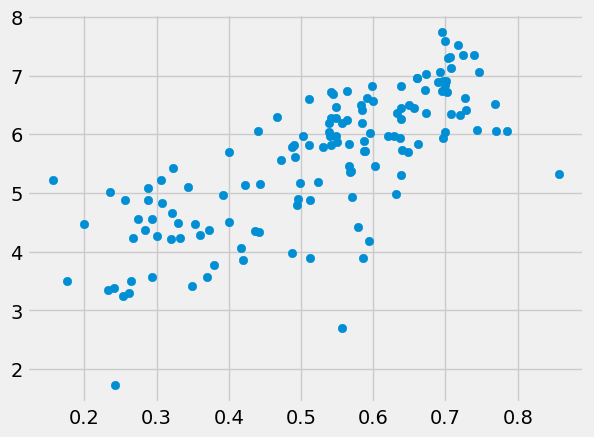

In [62]:
plots.scatter(filtered_expectancy_array, filtered_2_ladder_array)

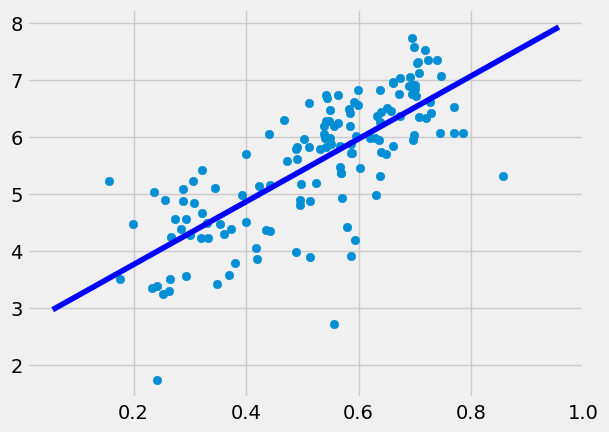

In [63]:
# write your solution to Problem 2C by completing codes in this code cell

# write one line of code below to draw the scatter plot
plots.scatter(filtered_expectancy_array, filtered_2_ladder_array)

# Specify the range of x values for the regression line
regline_x_values = np.arange(min(filtered_expectancy_array)-0.1, max(filtered_expectancy_array)+0.1, 0.05)

# write one line of code below to calculate the y values on the regression line, using regline_x_values, slope and intercept (from Problem 1A)
# store the calculated y values in a variable `regline_y_values`
regline_y_values = slope * regline_x_values + intercept

# plot the regression line in blue
# note: you need to first write the line of code above to calculate `regline_y_values`, before the line below for plotting would work
plots.plot(regline_x_values, regline_y_values, 'b')





# Problem 2D: Search for the slope and intercept of the linear regression model for predicting ``Ladder score`` from ``Healthy life expectancy`` using Python `minimize`  function that minimizes RMSE (similar to Problem 1D). (0.4 points)

In [ ]:
# Write your solution to Problem 2B in the following code cells

# Hint: You can reuse the code for Problem 1C (name the function linear_rmse2) and modify the input array.


In [64]:
# write your solution to Problem 2D in this code cell

def linear_rmse2(slope, intercept):
  X_array = filtered_expectancy_array
  Y_array = filtered_2_ladder_array

  # write code below to calculate and return the RMSE given input slope and intercept
  # ...
  data_size = len(X_array)
  sum_error_sq = 0
  predictions = Table().with_column('Y prediction', make_array())
  for i in range(0, data_size):
    Y_predict = X_array[i] * slope + intercept
    predictions = predictions.with_row([Y_predict])
    error = Y_array[i] - Y_predict
    sum_error_sq = sum_error_sq + (error**2)
  RMSE = (sum_error_sq/data_size)**0.5
  print("slope =", slope, ", intercept =", intercept, ", RMSE = ", RMSE)
  return(RMSE)


In [65]:
# call the minimize function with linear_rmse function as its argument
parameters = minimize(linear_rmse2)

# write code below to print out the optimal slope and intercept returned by the minimize function
# Note: the returned parameters is an array with two values, which are the optimal slope and intercept values

slope = 0.0 , intercept = 0.0 , RMSE =  5.66861284657
slope = 0.0 , intercept = 0.0 , RMSE =  5.66861284657
slope = 1.0 , intercept = 0.0 , RMSE =  5.13169379179
slope = 2.618034 , intercept = 0.0 , RMSE =  4.26899340959
slope = 178.98374 , intercept = 0.0 , RMSE =  92.5535682792
slope = 69.983737258 , intercept = 0.0 , RMSE =  32.8163397423
slope = 28.3494422106 , intercept = 0.0 , RMSE =  10.035301658
slope = 12.4465570686 , intercept = 0.0 , RMSE =  1.66296518015
slope = 11.8416262915 , intercept = 0.0 , RMSE =  1.428422475
slope = 9.40528666224 , intercept = 0.0 , RMSE =  1.16043187197
slope = 6.81278691186 , intercept = 0.0 , RMSE =  2.12736799166
slope = 10.0211770716 , intercept = 0.0 , RMSE =  1.08862179663
slope = 10.1815969066 , intercept = 0.0 , RMSE =  1.08648524902
slope = 10.2834128757 , intercept = 0.0 , RMSE =  1.08881736476
slope = 10.1815969066 , intercept = 0.0 , RMSE =  1.08648524902
slope = 10.1815969066 , intercept = 1.0 , RMSE =  1.32971063798
slope = 10.18159690

In [66]:
print(parameters)

[ 5.51419161  2.65483477]


# Problem 3 (1 point)
Answer the following questions:
- (a) Which model has a larger slope? (0.3 points)
- (b) Which model captures a stronger correlation relationship between the input variable and the prediction variable? (0.3 points)
- (c) Can the answer to (a) and (b) be different?  Explain the rationale of your answer. (0.4 points)

# Solution to Problem 3:
- (a) The second linear regression model based on expectancy has a larger slope of 5.51
- (b) The first model has a correlation coefficient of around 0.80, the second has a coefficitent of around 0.75. Therefore, the first model has a stronger correlation relationship.
- (c) Yes, the answers between the (a) and (b) could be different as slope is not a measure of how strongly correlated two variables are. It is simply the rate of change between two variables. On the other hand, the correlation coefficient shows how well the input predicts the output.